# Classification (Decision Tree vs KNN) and Apriori (Section 2 Task 3)

Train and evaluate a Decision Tree and a KNN classifier on Iris, visualize the tree, and run Apriori on a synthetic transactional dataset.

## Prepare data and outputs

Load preprocessed iris CSV, create outputs directories, and split into train/test sets for classification.

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import json

PROJECT_ROOT = Path.cwd().parent
IMAGES_DIR = PROJECT_ROOT / 'outputs' / 'images'
REPORTS_DIR = PROJECT_ROOT / 'outputs' / 'reports'
IMAGES_DIR.mkdir(parents=True, exist_ok=True)
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(PROJECT_ROOT / 'data' / 'iris_preprocessed.csv')
X = df[df.columns[:4]].values
y = df['species_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Train Decision Tree and KNN; save classification reports and visualize the tree

Train two models, evaluate on the test set, save a JSON summary of classification metrics, and save a plot of the decision tree.

Saved classification report to c:\Users\HP\Documents\DSA2040_Practical_Exam_Geoffrey_Mwangi_566\outputs\reports\classification_report.json


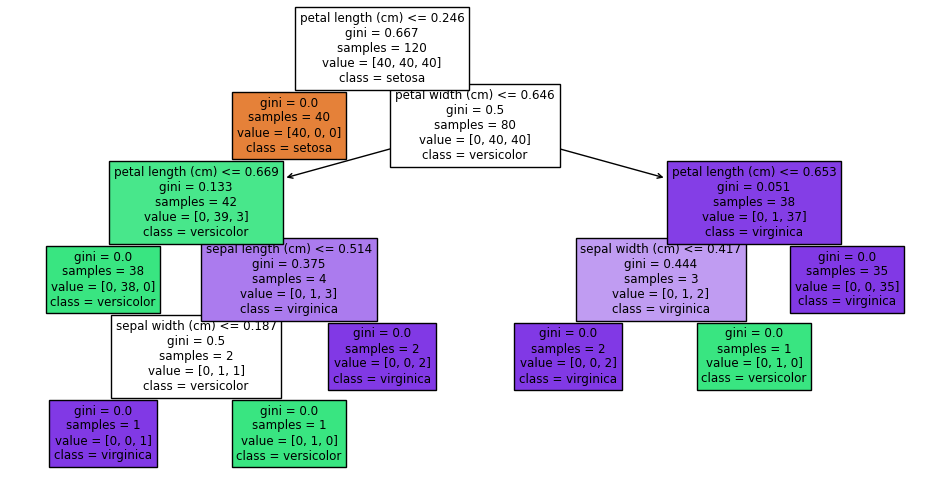

In [2]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
rpt_dt = classification_report(y_test, y_pred_dt, output_dict=True)
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=df.columns[:4].tolist(), class_names=['setosa','versicolor','virginica'])
plt.savefig(IMAGES_DIR / 'decision_tree.png')


# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
rpt_knn = classification_report(y_test, y_pred_knn, output_dict=True)

(REPORTS_DIR / 'classification_report.json').write_text(json.dumps({'decision_tree':rpt_dt,'knn':rpt_knn}, indent=2))
print('Saved classification report to', REPORTS_DIR / 'classification_report.json')

## Apriori: generate synthetic transactions and mine rules

Generate synthetic transactions with injected co-occurrence patterns (e.g., diapers & beer), then run Apriori via mlxtend if available, else use a fallback implementation. Save top rules.

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import random
items = ['milk','bread','beer','diapers','eggs','cheese','butter','sugar','coffee','tea','apple','banana','chocolate','cereal','juice','water','soap','shampoo','toothpaste','napkins']

def generate_transactions(num_tx=40, seed=42):
    random.seed(seed)
    txs=[]
    for i in range(num_tx):
        size = random.randint(3,8)
        basket = set(random.choices(items,k=size))
        if random.random() < 0.25:
            basket.add('diapers'); basket.add('beer')
        txs.append(list(basket))
    return txs

transactions = generate_transactions(40, seed=42)


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_tx = pd.DataFrame(te_ary, columns=te.columns_)
freq_items = apriori(df_tx, min_support=0.2, use_colnames=True)
rules = association_rules(freq_items, metric='confidence', min_threshold=0.5)
rules_sorted = rules.sort_values('lift', ascending=False).head(5)
(REPORTS_DIR / 'apriori_rules.json').write_text(rules_sorted.to_json(orient='records'))
print('Saved top Apriori rules to', REPORTS_DIR / 'apriori_rules.json')

Saved top Apriori rules to c:\Users\HP\Documents\DSA2040_Practical_Exam_Geoffrey_Mwangi_566\outputs\reports\apriori_rules.json
